# CIFAR10 데이터로 신경한 훈련

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
print(train_images.shape, train_labels.shape) #airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck 순으로 10개의 라벨
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
train_labels[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

### 데이터 시각화

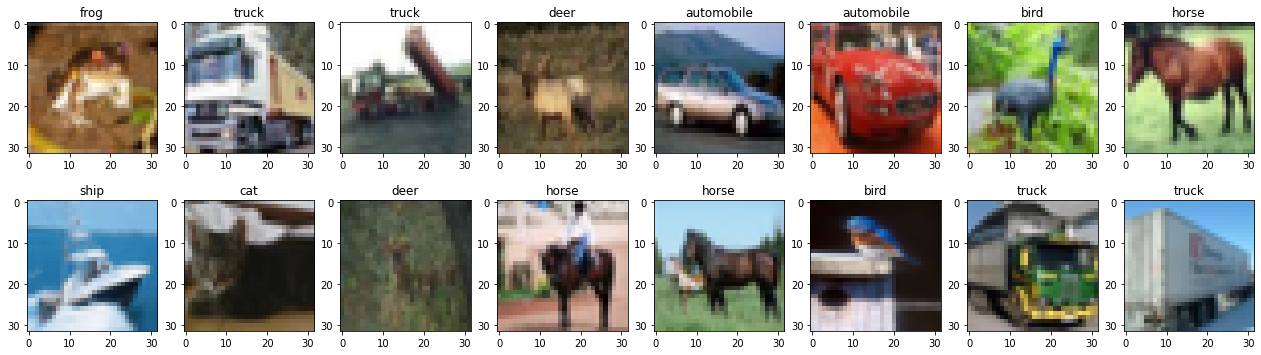

In [7]:

plt.figure(figsize = (22,6))

for i in range(16):
    ax = plt.subplot(2, 8, i+1)
    ax.set_title(class_names[train_labels.flatten()[i]])
    ax.imshow(train_images[i])

### 데이터 전처리

In [8]:
train_images = np.array(train_images/255.0, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)
test_images = np.array(test_images/255.0, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

### 모델 생성

In [31]:
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, MaxPooling3D, BatchNormalization, Activation

In [32]:
tf.keras.backend.clear_session() #기존에 있던 모델 클리어

input_tensor = Input(shape = (32, 32, 3))
x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='same')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='same')(x) # valid는 패딩 False와 같음
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same')(x) # valid는 패딩 False와 같음
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same')(x) # valid는 패딩 False와 같음
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

#x = Conv2D(filters=256, kernel_size=(2, 2), strides=1, padding='same', activation='relu')(x)
#x = Conv2D(filters=256, kernel_size=(2, 2), strides=1, padding='same', activation='relu')(x) # valid는 패딩 False와 같음
#x = MaxPooling2D(pool_size=(2,2))(x)

print(x.shape)
x = Flatten()(x)
print(x.shape)
x = Dropout(0.5)(x)
x = Dense(300, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

(None, 4, 4, 128)
(None, 2048)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (

In [33]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [37]:
checkpoint_cb = ModelCheckpoint("my_keras_model.h5", save_best_only=True, verbose=1) 
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)
reducelr_cb = ReduceLROnPlateau(verbose=1)

In [39]:
history = model.fit(x=train_images, y=train_oh_labels, validation_data=(test_images, test_oh_labels), epochs=30, batch_size=128, callbacks=[checkpoint_cb, early_stopping_cb, reducelr_cb]) 

Epoch 1/30
391/391 [==============================] - 15s 36ms/step - loss: 0.2178 - accuracy: 0.9258 - val_loss: 0.7482 - val_accuracy: 0.8064

Epoch 00001: val_loss improved from inf to 0.74817, saving model to my_keras_model.h5
Epoch 2/30
391/391 [==============================] - 13s 33ms/step - loss: 0.1964 - accuracy: 0.9330 - val_loss: 0.7548 - val_accuracy: 0.8109

Epoch 00002: val_loss did not improve from 0.74817
Epoch 3/30
391/391 [==============================] - 13s 33ms/step - loss: 0.2010 - accuracy: 0.9338 - val_loss: 0.8215 - val_accuracy: 0.8052

Epoch 00003: val_loss did not improve from 0.74817
Epoch 4/30
391/391 [==============================] - 13s 33ms/step - loss: 0.1939 - accuracy: 0.9350 - val_loss: 0.8276 - val_accuracy: 0.7944

Epoch 00004: val_loss did not improve from 0.74817
Epoch 5/30
391/391 [==============================] - 13s 33ms/step - loss: 0.1923 - accuracy: 0.9334 - val_loss: 0.8041 - val_accuracy: 0.8040

Epoch 00005: val_loss did not improv

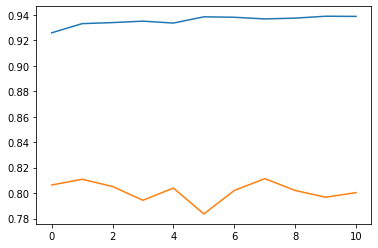

In [40]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'valid')

In [41]:
train_images.shape

(50000, 32, 32, 3)

In [42]:
predict_proba = model.predict(np.reshape(test_images[0], (-1, 32, 32, 3)))
predict = np.argmax(predict_proba, axis=1)
predict

array([3])

In [43]:
np.argmax(test_oh_labels, axis=1)

array([3, 8, 8, ..., 5, 1, 7])

In [44]:
model.evaluate(test_images, test_oh_labels, batch_size=128, verbose=1)

79/79 [==============================] - 1s 13ms/step - loss: 0.7482 - accuracy: 0.8064


[0.7481663823127747, 0.8064000010490417]

In [45]:
!nvidia-smi

Fri Sep 10 08:40:45 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    72W / 149W |   4361MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------